In [38]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [12]:
#one sample proporti test
P=0.15
p=0.2
q=0.85
n=500
se=np.sqrt((p*q)/n)
se

0.018439088914585774

In [18]:
z=p-P
z

0.05000000000000002

In [ ]:
proportions_ztest([])

In [13]:
#two sample  proportion test
#H0


nm=500
nf=500
xm=200
xf=150
pm=xm/nm
pf=xf/nf
se=np.sqrt((pm*(1-pm)/nm)+(pf*(1-pf)/nf))
se


0.03

In [14]:
zcal=(pm-pf)/se
zcal

3.3333333333333344

In [16]:
proportions_ztest([200,150],[500,500])

(3.3149677206589807, 0.0009165370761145276)

### chi squrare test

###### problem statement:is there any assosciation between gender and brand prefreence?
h0:there is no assosciation betweeen gender and brand prefrences


h1:there is assosciation between gender and brand assosciation

In [21]:
bpm=np.array([15,12,10,10,6,8,9,10]).reshape(4,2)

In [41]:
import scipy.stats as stats

In [25]:
stats.chi2_contingency(bpm)

(0.6716791979949874, 0.8798441932056964, 3, array([[13.5, 13.5],
        [10. , 10. ],
        [ 7. ,  7. ],
        [ 9.5,  9.5]]))

###### 0.67=chi squre value,0.87=p-value,3=degree of freedom,[13.5,13.5]=expected value matrix

# practice dataset

In [29]:
df=pd.read_csv('cs1.csv')  #pl=personal loan
df.iloc[0:10]

,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [28]:
df.isnull().sum()

id             0
age            0
gender         0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pl             0
dtype: int64

##### lets check whether   there is any assosciaton between pl and region

In [44]:
# H0:there is  asscociation betweeen pl and region
#H1:there is assosciation between region and pl

In [47]:
rpl=pd.crosstab(df['pl'],df['region'])
rpl

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pl,,,,
NO,85,26,14,57
YES,70,28,11,39


In [50]:
stats.chi2_contingency(rpl)

(1.776514811293037,
 0.6200588623676881,
 3,
 array([[85.48484848, 29.78181818, 13.78787879, 52.94545455],
        [69.51515152, 24.21818182, 11.21212121, 43.05454545]]))

In [57]:
stats.chi2.ppf(0.95,3)  # its a chi square distribution so we use chi2 

7.814727903251179

#### Q. is there any assosciation between number of children and pl?

In [60]:
# H1: there is  assosciation between pl and children
# h0:there is  no association between pl and children
# alpha=0.5

cpl=pd.crosstab(df['children'],df['pl'])
cpl

pl,NO,YES
children,,
0,90,51
1,12,57
2,50,32
3,30,8


In [62]:
stats.chi2_contingency(cpl)

(53.89216994212963,
 1.1830750145503304e-11,
 3,
 array([[77.76363636, 63.23636364],
        [38.05454545, 30.94545455],
        [45.22424242, 36.77575758],
        [20.95757576, 17.04242424]]))

In [63]:
stats.chi2.ppf(0.95,3)

7.814727903251179

pvalue(1830750145503304e-11)is very very small nearer to zero and less than alpha
so reject null hypothesis and accept H1 means have assosciation between the pl and children

#### Q check wether the random generating alphabet machine is fit for goodness?


H0: the machie is fit for goodness H1:the machine is not fit for goodness

In [65]:
rn=np.array([25,19,12,19,25])

In [68]:
stats.chisquare(rn)

Power_divergenceResult(statistic=5.8, pvalue=0.21459055821998824)

In [71]:
stats.chi2.ppf(0.95,4)

9.487729036781154

In [73]:
#pvalue (0.21 is  greater than 0.05 hence accept h0; means machine is fit for goodness)

## Q ).is income same across the regions?

In [75]:
H0: mu_innercity=mu_suburban=mu_town=mu_rural
H1: mu_innercity!=mu_su
    
alpaha=0.5

In [83]:
df.groupby('region')['income'].mean()

region
INNER_CITY    26439.952645
RURAL         29912.181296
SUBURBAN      29462.098000
TOWN          26495.416146
Name: income, dtype: float64

In [84]:
import seaborn as sns

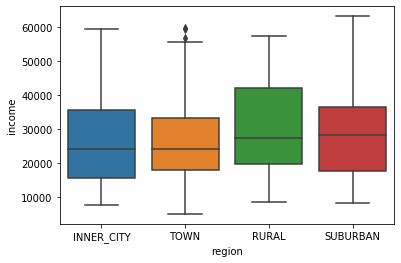

In [79]:
sns.boxplot(x='region',y='income',data=df)

In [94]:
ic=df[df['region']=='INNER_CITY']['income']
sub=df[df['region']== 'SUBURBAN']['income']
town=df[df['region']== 'RURAL']['income']
rural=df[df['region']=='TOWN']['income']


In [95]:
stats.f_oneway(ic,rural,town,sub)

F_onewayResult(statistic=1.2950173064832669, pvalue=0.27607567314467585)

In [108]:
fcritical=stats.f.ppf(0.95,3,326)
fcritical

2.6323096448361603

here fcalculated(1.29)is less than fcritical(2.63) so accept h0: ,hence thre is no differnce in average income w.r.t region

In [146]:
df.iloc[:10]

,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [112]:
a=(df.groupby('car')['income']).mean()
a

car
NO     26022.336839
YES    28626.129744
Name: income, dtype: float64

In [122]:
ha=df[df['car']=='YES']['income']
nha=df[df['car']=='NO']['income']


In [123]:
stats.f_oneway(ha,nha)

F_onewayResult(statistic=3.2896081108227047, pvalue=0.07063337879141182)

In [125]:
fcritical=stats.f.ppf(0.95,1,326)
fcritical

3.870141504138114

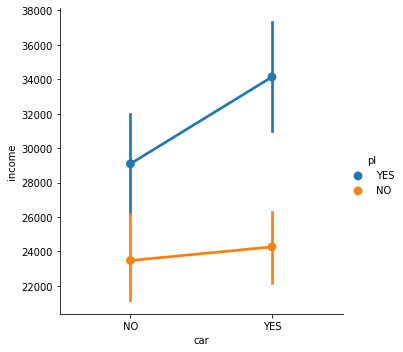

In [129]:
sns.factorplot(x='car',y='income',hue='pl',data=df)

## Q.example

In [96]:
r1=np.array([3,4,3,2])
r2=np.array([4,5,3])
r3=np.array([7,6,3,4])

In [97]:
stats.f_oneway(r1,r2,r3)

F_onewayResult(statistic=2.2857142857142856, pvalue=0.16399153063315347)

In [105]:
fcrit=stats.f.ppf(0.95,2,8)
fcrit

4.458970107524511

here fcaculated(2.28) is less than  fcritical(4.45) so accept H0:

## q

In [98]:
stats.f_oneway(df['children'],df['income'])

F_onewayResult(statistic=1435.7391901699834, pvalue=1.5384168960361133e-167)